ANN- AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar,
            Andrew Smith,
            Christopher Lee,
            Alireza Bagheri,
            Musa Azim,
            Kuba Jerzmanowski
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"> ![Screenshot 2025-05-26 at 7.44.53 PM.png](<attachment:Screenshot 2025-05-26 at 7.44.53 PM.png>) </a>
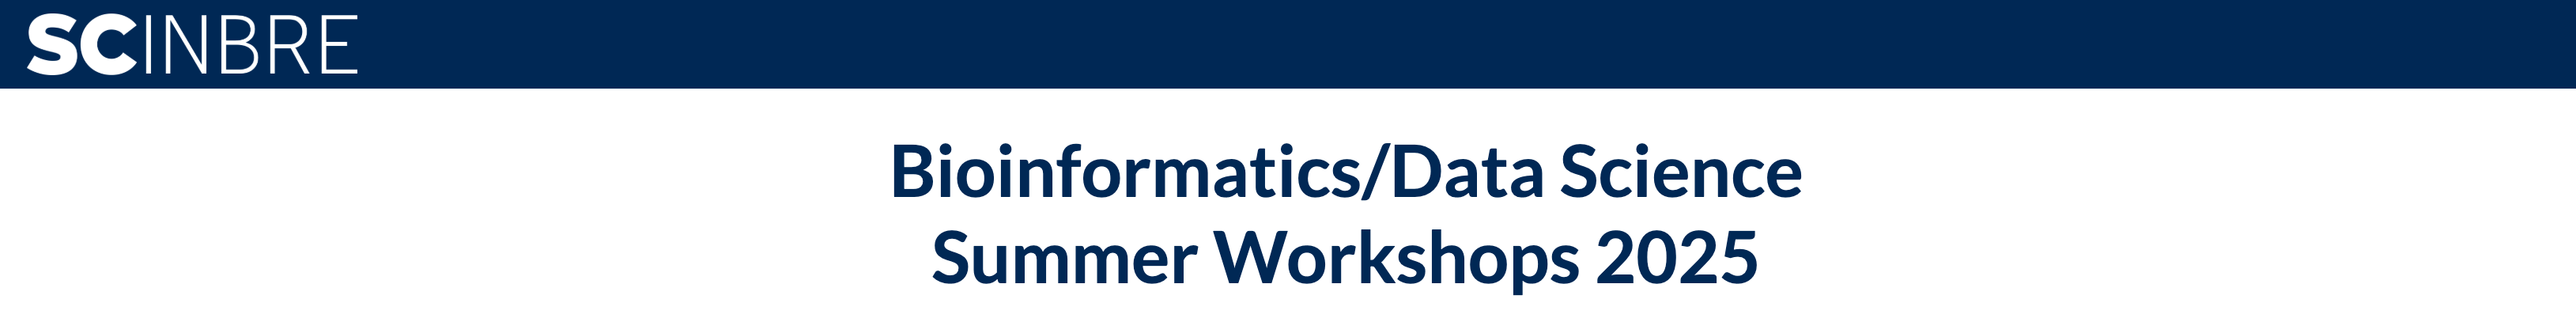

# Machine Learning in Python -  Artificial Neural Networks Workshop

### May 30th, 2025


# First hour - Understanding Artificial Neural Networks

### What Are Neural Networks?

Imagine you're trying to identify whether an email is spam or not. A human might look at various features:
- Does it contain suspicious words?
- Is the sender unknown?
- Are there unusual patterns?

An artificial neural network mimics this decision-making process by:
1. **Taking inputs** (email features)
2. **Processing information** through interconnected nodes
3. **Producing an output** (spam/not spam)

### Real-World Applications Across Disciplines

- **Medicine**: Diagnosing diseases from medical images
- **Economics**: Predicting market trends and stock prices
- **Psychology**: Analyzing behavioral patterns
- **Biology**: Protein structure prediction
- **Linguistics**: Language translation and sentiment analysis
- **Environmental Science**: Climate modeling and prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## What is a Neuron?

Let's start with a simple analogy. A biological neuron receives signals, processes them, and fires if the combined input exceeds a threshold.

- Think of a neuron as a little box that holds a number between 0 and 1.

- This number is called its activation — how “active” it is.

### Lets make a neuron deciding whether to recommend a research paper

In [2]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand


import plotly.graph_objects as go
import plotly.express as px

# Your data (replace with your actual values)
inputs = [0.8, 0.6, 0.9]  # Relevance, Author Rep., Citations
weights = [0.5, 0.3, 0.2]  # Corresponding weights
bias = 0.1  # Bias term
categories = ['Relevance', 'Author Rep.', 'Citations']

# Calculate weighted contributions
contributions = [i * w for i, w in zip(inputs, weights)]
weighted_sum = sum(contributions)
linear_output = weighted_sum + bias

# Apply activation function (sigmoid as example)
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

activated_output = sigmoid(linear_output)

# Create Sankey diagram with multiplication emphasis and bias
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 50,
      line = dict(color = "black", width = 2),
      label = categories + [f"{inp:.2f} × {w:.1f}" for inp, w in zip(inputs, weights)] + 
              [f"Weighted Sum<br>{weighted_sum:.3f}"] + [f"Bias<br>{bias:.1f}"] + 
              [f"Linear Output<br>{linear_output:.3f}"] + [f"σ(x)<br>Activation"] + [f"Final Output<br>{activated_output:.3f}"],
      color = ["skyblue", "lightgreen", "salmon", "lightblue", "lightpink", "lightyellow", "orange", "purple", "red", "darkgreen", "gold"],
      # Make nodes more circular with better positioning for activation
      x = [0.05, 0.05, 0.05, 0.25, 0.25, 0.25, 0.45, 0.45, 0.65, 0.8, 0.95],
      y = [0.8, 0.5, 0.2, 0.8, 0.5, 0.2, 0.65, 0.35, 0.5, 0.5, 0.5]
    ),
    link = dict(
      source = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],  # All source nodes
      target = [3, 4, 5, 6, 6, 6, 8, 8, 9, 10],  # Flow pattern with activation
      value = inputs + contributions + [weighted_sum, bias, linear_output, activated_output],  # All flow values
      color = ["rgba(135,206,235,0.6)", "rgba(144,238,144,0.6)", "rgba(250,128,114,0.6)",
               "rgba(135,206,235,0.8)", "rgba(144,238,144,0.8)", "rgba(250,128,114,0.8)",
               "rgba(255,165,0,0.8)", "rgba(128,0,128,0.8)", "rgba(255,0,0,0.8)", "rgba(0,100,0,0.8)"]
    ))])

fig.update_layout(
    title_text=f"Complete Neural Network Node<br>Linear: {linear_output:.3f} → Activation: σ({linear_output:.3f}) = {activated_output:.3f}",
    font_size=12,
    width=1400,
    height=600
)

fig.show()

# Alternative: More detailed version with intermediate nodes
print("\n" + "="*60)
print("COMPLETE NEURAL NETWORK NODE BREAKDOWN:")
print("="*60)
for i, (cat, inp, weight, contrib) in enumerate(zip(categories, inputs, weights, contributions)):
    print(f"{cat}: {inp:.2f} × {weight:.1f} = {contrib:.3f}")
print(f"Weighted Sum: {' + '.join([f'{c:.3f}' for c in contributions])} = {weighted_sum:.3f}")
print(f"Add Bias: {weighted_sum:.3f} + {bias:.1f} = {linear_output:.3f}")
print(f"Apply Activation: σ({linear_output:.3f}) = {activated_output:.3f}")
print(f"Final Activated Output: {activated_output:.3f}")
print("="*60)


COMPLETE NEURAL NETWORK NODE BREAKDOWN:
Relevance: 0.80 × 0.5 = 0.400
Author Rep.: 0.60 × 0.3 = 0.180
Citations: 0.90 × 0.2 = 0.180
Weighted Sum: 0.400 + 0.180 + 0.180 = 0.760
Add Bias: 0.760 + 0.1 = 0.860
Apply Activation: σ(0.860) = 0.703
Final Activated Output: 0.703


In [3]:
import math

def sigmoid(x):
    """Sigmoid activation function: squashes input to range (0, 1)."""
    return 1 / (1 + math.exp(-x))

def real_neuron(inputs, weights, bias):
    """
    A realistic artificial neuron using sigmoid activation.
    - inputs: list of input values
    - weights: list of weights (one for each input)
    - bias: a single bias value
    """
    # Weighted sum: z = w1*x1 + w2*x2 + ... + wn*xn + b
    z = sum(i * w for i, w in zip(inputs, weights)) + bias

    # Activation: "squishes” the result to be 0-1 
    output = sigmoid(z)

    return output, z

# Example: A neuron deciding whether to recommend a research paper
inputs = [0.2, 0.3, 0.9]                  # [Relevance, Reputation, Citations]
weights = [0.6, 0.3, 0.1]                 # Importance of each feature
bias = -0.35                              # Baseline adjustment

activation, weighted_sum = real_neuron(inputs, weights, bias)
print(f"Weighted Sum (z): {weighted_sum:.3f}")
print(f"Recommendation Confidence (sigmoid output): {activation:.3f}")
print(f"Recommend Paper: {'Yes' if activation > 0.5 else 'No'}")


Weighted Sum (z): -0.050
Recommendation Confidence (sigmoid output): 0.488
Recommend Paper: No


output = σ(w₁×x₁ + w₂×x₂ + w₃×x₃ + bias)

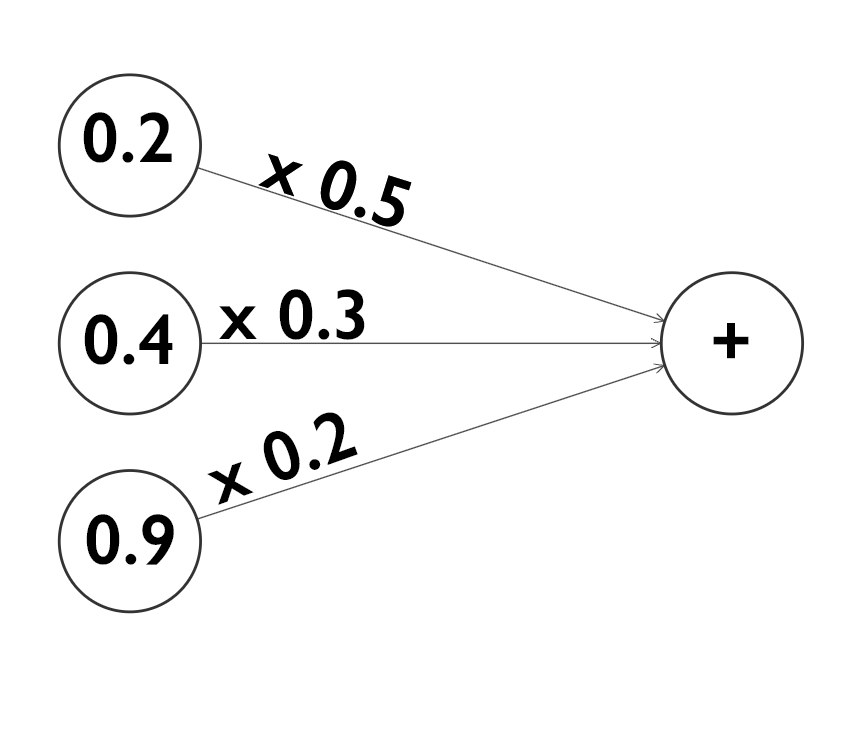

## What is a ANN ?

A neural network is just a function that maps input numbers to output numbers. Made up of a bunch of neurons.

**Input Layer**: One neuron for each input feature (We have 3 inputs)

**Hidden Layers**: Intermediate steps where neurons detect features (We have one layers with 2 neurons) 

**Output Layer**: One neuron or more that return final predication (We have just one output neuron)

![Screenshot 2025-05-26 at 12.31.28 PM.png](<attachment:Screenshot 2025-05-26 at 12.31.28 PM.png>)
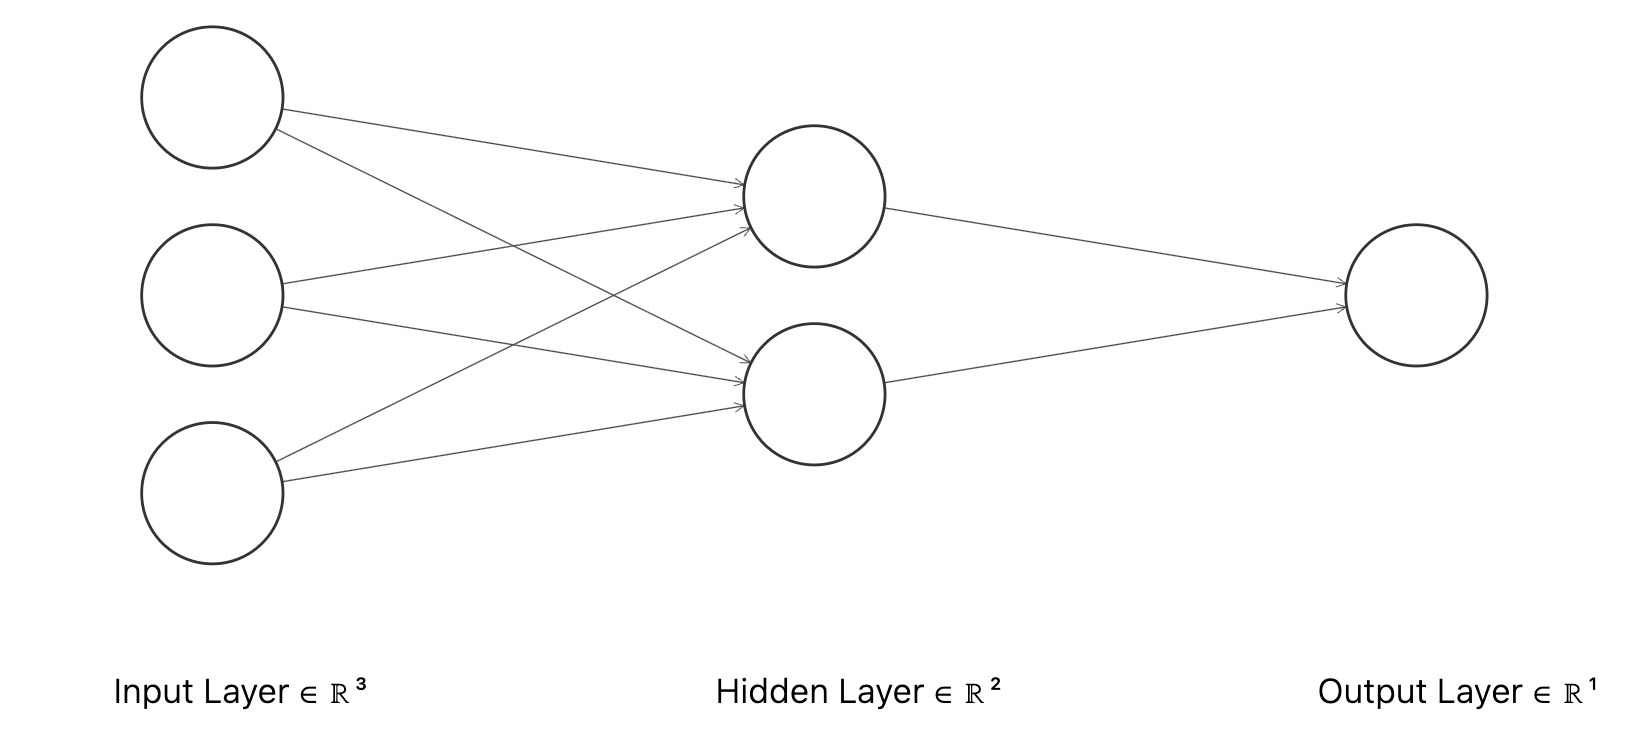

Changing Weights = Changing Behavior

`weights = [0.5, 0.3, 0.2]` *OLD WEIGHTS*

If we change weights to `weights = [0.1, 0.1, 0.8]`, we’re saying that citations matter way more than topic relevance or reputation.  

In [4]:
weights = [0.1, 0.1, 0.8]

activation, weighted_sum = real_neuron(inputs, weights, bias)
print(f"Weighted Sum (z): {weighted_sum:.3f}")
print(f"Recommendation Confidence (sigmoid output): {activation:.3f}")
print(f"Recommend Paper: {'Yes' if activation > 0.5 else 'No'}")

Weighted Sum (z): 0.420
Recommendation Confidence (sigmoid output): 0.603
Recommend Paper: Yes


### So… How Do We Make the Network Act Intelligently?

Now that we’ve seen that changing the weights in our network changes its behavior, we know we must pick the right set of weights for our problem. 

- If the weights are random, the output is random.

- If the weights are tuned correctly, the network makes accurate predictions.

So... how do we find the right weights?

<br> 

Could We Just Set Them by Hand?

Technically, yes — you could sit down and adjust every weight manually until the output looks good.

But even for a small neural network that would be a nightmare.

Imagine trying to set every dial on a massive control panel just right...
...by hand... with trial and error.

That’s where loss functions and gradient descent come in — the mathematical tools that let neural networks "teach themselves".

<br><br><br><br>
___

### How Learning Happens ?

For every predication we can calcalute the Loss. Think of this as the network’s report card.

- It tells the network: "How wrong was your prediction?"

- If the network says “don’t recommend” but should have said "recommend.” The loss is high.

- If it says “recommend” and it was right. The loss is low.

#### Mathematically:
    Loss = (prediction - target)²


ex. if the correct answer is `1` (recommend) and the network outputs `0.2`:

`Loss = (0.2 - 1)² = 0.64`

If it gets closer, like `0.95`:

`Loss = (0.95 - 1)² = 0.0025`

<br><br><br><br>
___
###  So How Do We Find Better Weights?

There’s no simple formula for the best weights in a neural network.
Instead, we take small, smart steps to gradually reduce the loss.

**Gradient Descent**: Climbing Down the Mountain
Imagine the loss function like a 3D landscape.
The height of the hill = how wrong the network is.
We want to go downhill to the lowest point — the smallest loss.

How do we know which way is down?

We compute the gradient and take a small step in the negative direction of the gradient

It tells us:

- Which weights to change

- In which direction

- By how much

By following the negative gradient, we go downhill in the loss landscape.

Do this repeatedly, and the network’s predictions get better and better.
<br><br><br><br>
___
### **HOW A NN LEARNS** (Training Loop):

1. Feed data into the network.

2. Compute the prediction.

3. Measure how wrong it is (loss).

4. Use gradient descent to adjust weights to reduce that loss.

5. Repeat for many, many examples.

In [5]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand




# def parameter ranges
theta0 = np.linspace(0, 1, 50)
theta1 = np.linspace(0, 1, 50)
THETA0, THETA1 = np.meshgrid(theta0, theta1)

# def a complex cost function J(theta0, theta1) similar to the image
J = (np.sin(6 * THETA0) * np.cos(6 * THETA1) * 0.5 + 
     np.exp(-((THETA0 - 0.3)**2 + (THETA1 - 0.7)**2) * 10) * 2 +
     np.exp(-((THETA0 - 0.7)**2 + (THETA1 - 0.3)**2) * 8) * 1.5 -
     np.exp(-((THETA0 - 0.5)**2 + (THETA1 - 0.5)**2) * 5) * 3 +
     (THETA0 - 0.5)**2 + (THETA1 - 0.5)**2)

# Create the figure
fig = go.Figure()

# Add the surface plot
surface = fig.add_trace(go.Surface(
    x=THETA0,
    y=THETA1,
    z=J,
    colorscale='Rainbow',  # Similar to your image colors
    opacity=0.8,
    name='Cost Function',
    showscale=False

))

# Simulate an optimization path (gradient descent)
np.random.seed(42)
path_theta0 = [0.8, 0.75, 0.7, 0.68, 0.65, 0.6, 0.55, 0.52, 0.5, 0.48]
path_theta1 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.42, 0.45, 0.47, 0.48, 0.49]

# Calculate J values for the path
path_j = []
for t0, t1 in zip(path_theta0, path_theta1):
    j_val = (np.sin(6 * t0) * np.cos(6 * t1) * 0.5 + 
             np.exp(-((t0 - 0.3)**2 + (t1 - 0.7)**2) * 10) * 2 +
             np.exp(-((t0 - 0.7)**2 + (t1 - 0.3)**2) * 8) * 1.5 -
             np.exp(-((t0 - 0.5)**2 + (t1 - 0.5)**2) * 5) * 3 +
             (t0 - 0.5)**2 + (t1 - 0.5)**2)
    path_j.append(j_val)

# Add the optimization path as a 3D line
fig.add_trace(go.Scatter3d(
    x=path_theta0,
    y=path_theta1,
    z=path_j,
    mode='lines+markers',
    line=dict(color='black', width=8),
    marker=dict(
        size=6,
        color='black',
        symbol='circle'
    ),
    name='Optimization Path'
))

# Add start point (green)
fig.add_trace(go.Scatter3d(
    x=[path_theta0[0]],
    y=[path_theta1[0]],
    z=[path_j[0]],
    mode='markers',
    marker=dict(size=12, color='green'),
    name='Start Point'
))

# Add end point (red)
fig.add_trace(go.Scatter3d(
    x=[path_theta0[-1]],
    y=[path_theta1[-1]],
    z=[path_j[-1]],
    mode='markers',
    marker=dict(size=12, color='red'),
    name='End Point'
))

# Update layout for better viz
fig.update_layout(
    title={
        'text': 'Interactive Cost Function Surface with Optimization Path',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    scene=dict(
        xaxis_title='θ₀',
        yaxis_title='θ₁',
        zaxis_title='J(θ₀,θ₁)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        aspectmode='cube'
    ),
    width=900,
    height=700,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

**Lets take a look at**:
[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


## Building a Neural Network

Let's create a neural network to solve a classic problem: classifying academic papers into different research fields.

In [6]:
# Generate a synthetic dataset with easy separability
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,        # Number of features (dimensions)
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_clusters_per_class=2,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=2,         # Separation between the classes
    random_state=42
)

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Why Train-Test Splitting is Essential

**The Core Problem**: Without proper data splitting, you're essentially "grading your own homework." A model that has seen all the data during training will appear to perform perfectly, but this performance is misleading—it won't generalize to new, unseen data.

<br>

**Real-World Analogy**: It's like studying for an exam with the answer key, then taking that same exam. Your exaM performance doesn't predict how you'll do on a different, unseen exam.

The ultimate goal is a model that works on future, unknown data. However training performance alone is not a reliable indicator of real-world performance. Models can memorize training data rather than learning genuine patterns (Overfitting). 

To evaluate if we are overfitting we use test data which provides an unbiased estimate of real-world performance. The model must **NEVER** see test data during training. High training accuracy with low test accuracy indicates overfitting. 
___


### How Interpret Results

#### Good Signs:
- Training and test accuracy are close 
- Both accuracies are reasonably high for your problem

#### Warning Signs:
- **Training: 99%, Test: 70%** → Severe overfitting
- **Training: 60%, Test: 58%** → Underfitting (model too simple)

### Visual Understanding

When you see the scatter plot with:
- **Circles (o)**: Training data the model learns from
- **X marks**: Test data the model has never seen

### Common Misconceptions

1. **"100% training accuracy means success"** → Usually indicates overfitting
2. **"We can peek at test data to improve our model"** → This causes data leakage and invalid results

### Remember

Train-test splitting is not just a technical step, it's the foundation of trustworthy AI. Without it, you cannot know if your model will work in the real world.

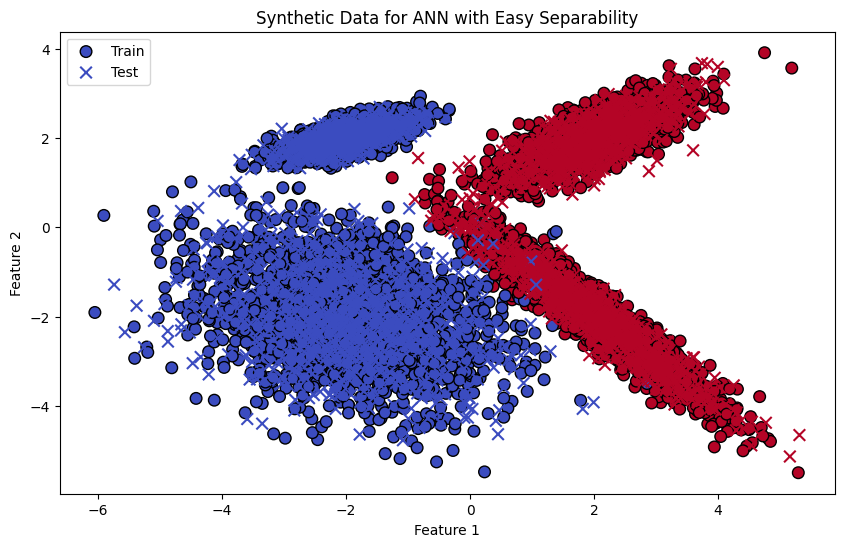

In [8]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x',  s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [9]:
# Output dataset shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (7000, 2)
Testing data shape: (3000, 2)
Training labels shape: (7000,)
Testing labels shape: (3000,)


In [10]:
# Create the multilayer ANN
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(8, 4, 2),  # Three hidden layers with [8, 4, 2] neurons 
    activation='relu',
    solver='adam',
    max_iter=500,
    verbose=True,
    random_state=42
)

![Screenshot 2025-05-26 at 1.14.06 PM.png](<attachment:Screenshot 2025-05-26 at 1.14.06 PM.png>)
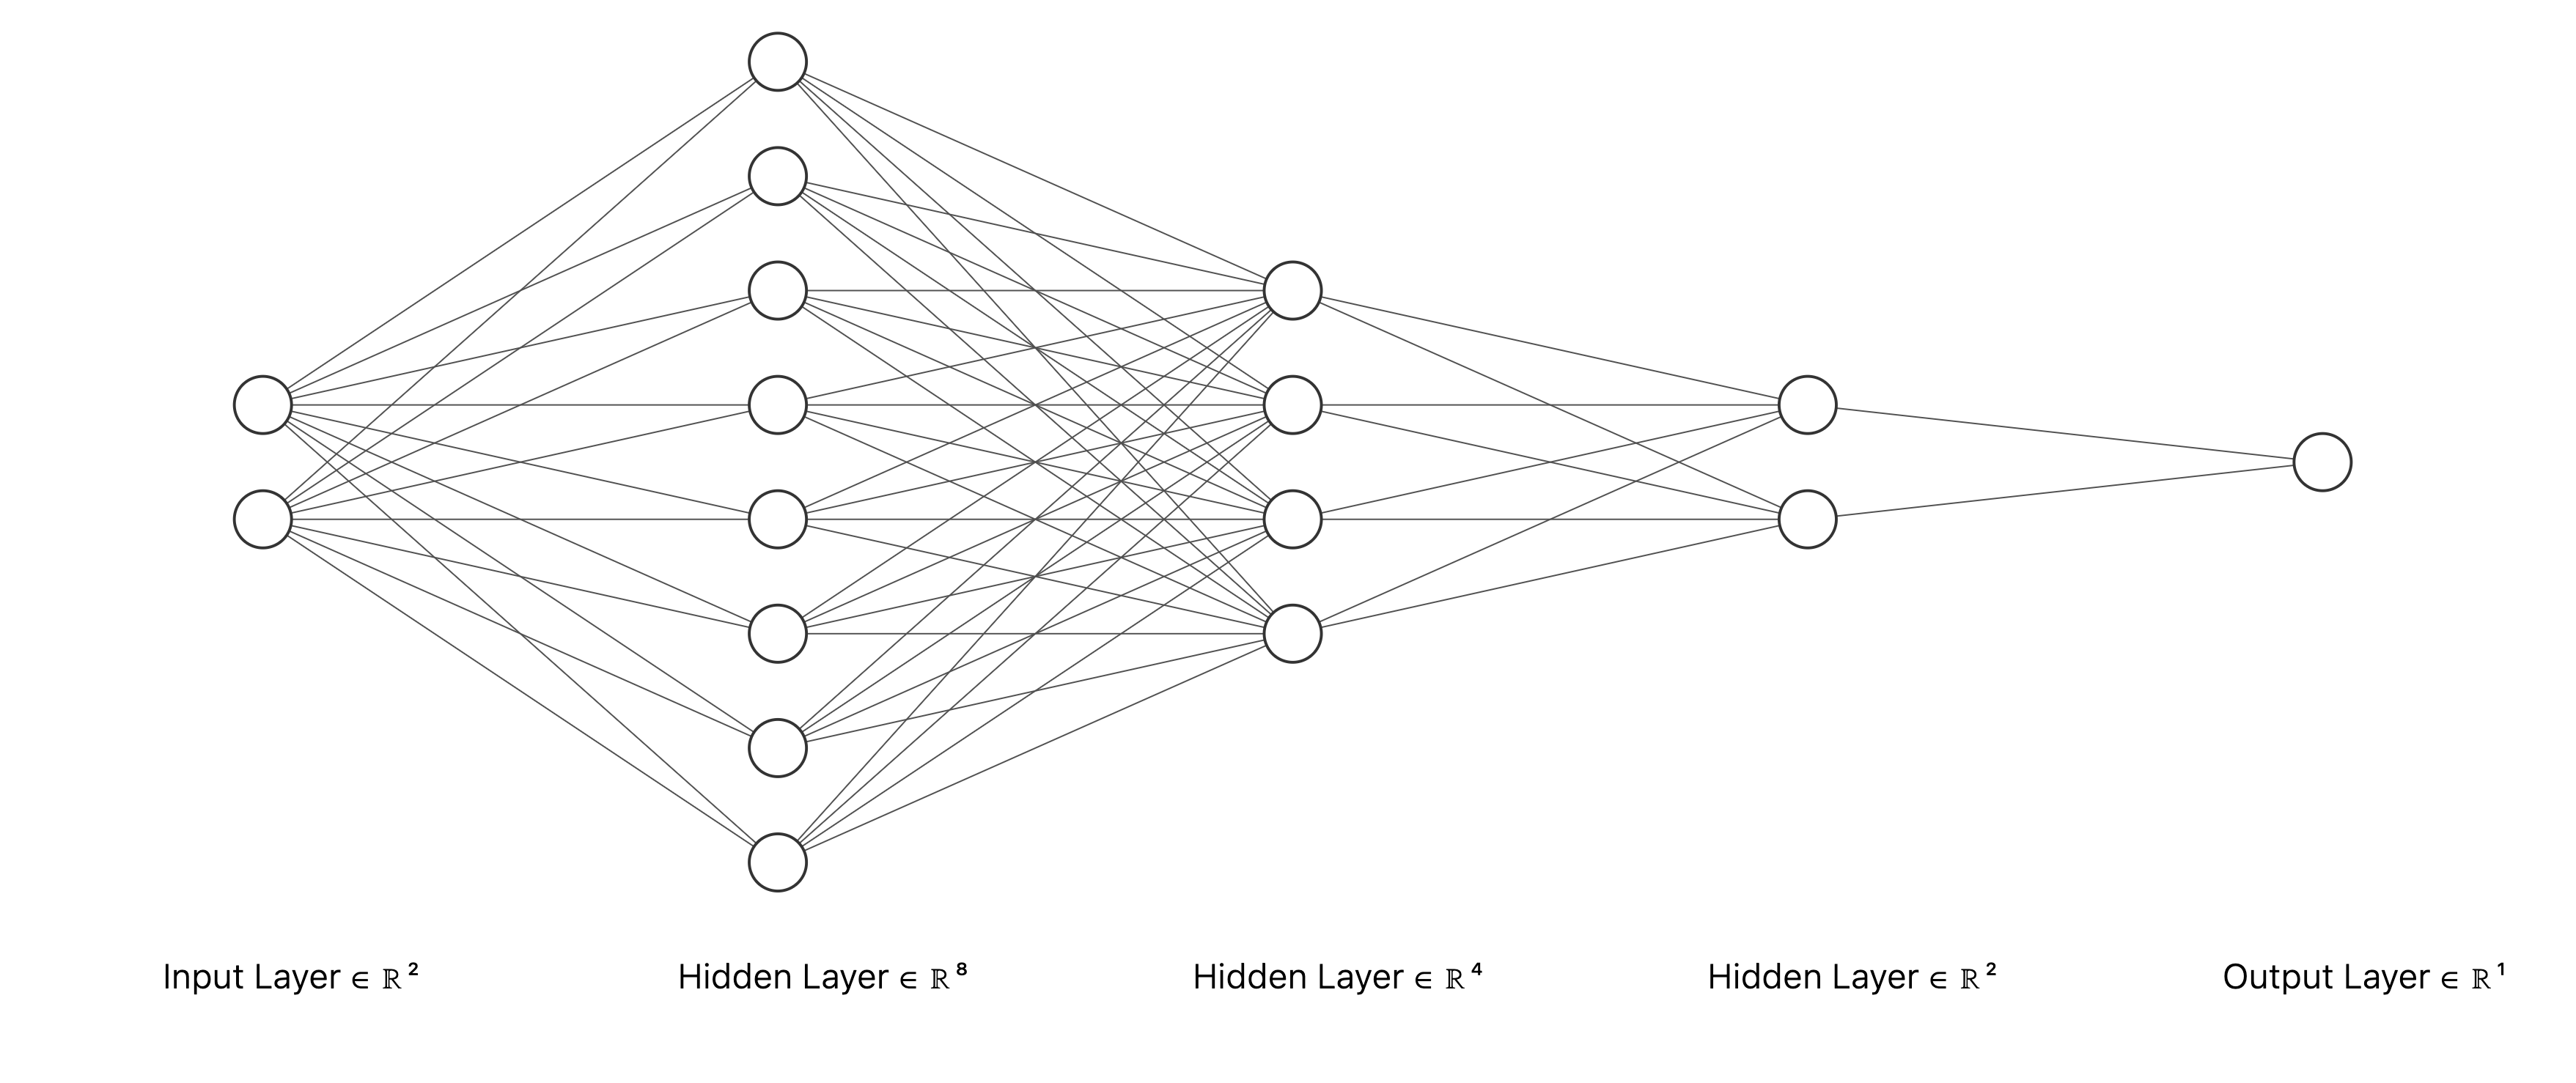

In [11]:
# Train the multilayer ANN# Train the multilayer ANN
mlp.fit(X_train, y_train);

Iteration 1, loss = 1.23989034
Iteration 2, loss = 1.13715457
Iteration 3, loss = 1.05511993
Iteration 4, loss = 0.98190823
Iteration 5, loss = 0.90934491
Iteration 6, loss = 0.77592527
Iteration 7, loss = 0.66366396
Iteration 8, loss = 0.59543005
Iteration 9, loss = 0.55408824
Iteration 10, loss = 0.52510395
Iteration 11, loss = 0.50305015
Iteration 12, loss = 0.48458910
Iteration 13, loss = 0.46851193
Iteration 14, loss = 0.45317472
Iteration 15, loss = 0.43719691
Iteration 16, loss = 0.40541577
Iteration 17, loss = 0.25461046
Iteration 18, loss = 0.10686244
Iteration 19, loss = 0.06517212
Iteration 20, loss = 0.04850674
Iteration 21, loss = 0.03984743
Iteration 22, loss = 0.03431149
Iteration 23, loss = 0.03041380
Iteration 24, loss = 0.02740599
Iteration 25, loss = 0.02505065
Iteration 26, loss = 0.02318976
Iteration 27, loss = 0.02168699
Iteration 28, loss = 0.02037411
Iteration 29, loss = 0.01925753
Iteration 30, loss = 0.01827770
Iteration 31, loss = 0.01733581
Iteration 32, los

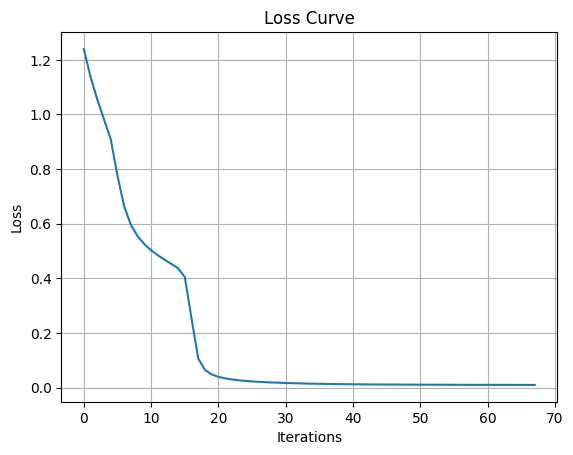

In [12]:
# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [13]:
# Test the ANN
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

In [14]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_report_test)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1482
           1       0.99      1.00      1.00      1518

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



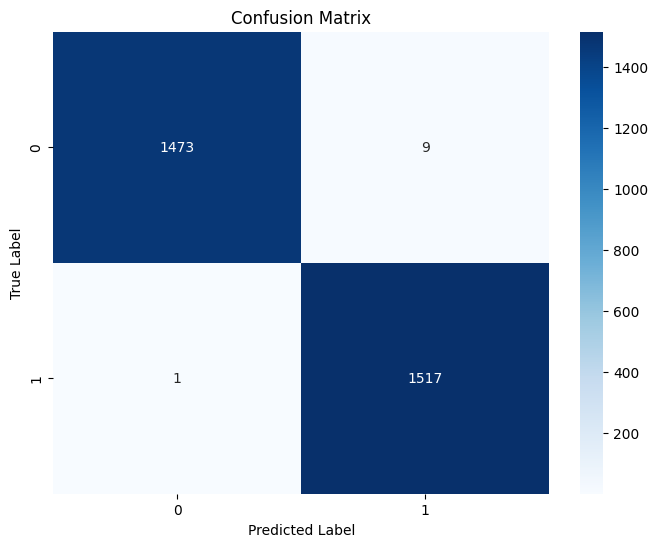

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

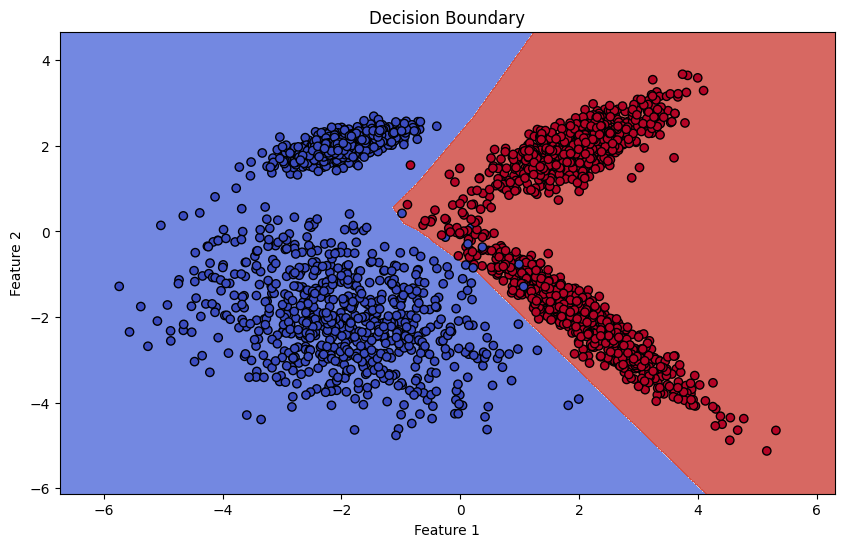

In [16]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, mlp)
plt.show()

## Hour 1 Exercise: 

That was a lot! Lets take a break and ask any questions we might have.

---

# Second hour: The Steps

All week we've been discussing different AI algorithms. What's the standard playbook for implementing them? How do we actually use these techniques?

## What this boils down to:

1. Retrieve data
2. Normalize data
3. Split data (Train/Test)
4. Build/decide on model type/architecture (ANN, RF, KNN, etc.)
5. Train model
6. Evaluate results


In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import Normalizer

### Let's work through these steps using a new example from scratch. 
We will use the sklearn breast cancer dataset. 

It contains 569 samples each with 30 numeric, predictive features.

Each sample belongs to one of two classes (Malignant or Benign).



**Step 1**: Load the breast cancer dataset.

In [28]:
data = load_breast_cancer()
X, y = data.data, data.target
print(f"Dataset shape: {X.shape}")
print(f"Features: {data.feature_names[:5]}...")  # Show first 5 features
print(f"Classes: {data.target_names}")

Dataset shape: (569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Classes: ['malignant' 'benign']


Unlike your synthetic datasets, this is real medical data with 30 features - more complex than the 2D examples we've been using.

**Step 2**: Normalize Data.

In [29]:
# Why normalize? Neural networks are sensitive to feature scales
norm = Normalizer()
X_scaled = norm.fit_transform(X)

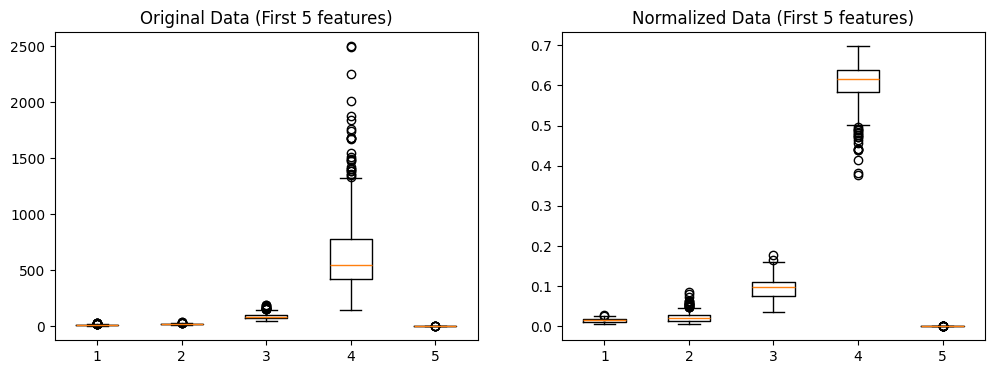

In [30]:
# Show the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.boxplot(X[:, :5])
ax1.set_title("Original Data (First 5 features)")
ax2.boxplot(X_scaled[:, :5])
ax2.set_title("Normalized Data (First 5 features)")
plt.show()

Notice how different features have vastly different scales. Neural networks multiply these values by weights - imagine if one feature ranges 0-1 and another 0-1000. The large values would dominate learning.

**Step 3**: Split Data.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Class distribution in training: {np.bincount(y_train)}")

Training set: (455, 30)
Test set: (114, 30)
Class distribution in training: [170 285]


**Step 4**: Build Model Architecture.

In [168]:
nn_simple = MLPClassifier(
   hidden_layer_sizes=(10,),  # One hidden layer with 10 neurons
   random_state=56,
   max_iter=1000,
)


![Screenshot 2025-05-26 at 2.21.57 PM.png](<attachment:Screenshot 2025-05-26 at 2.21.57 PM.png>)
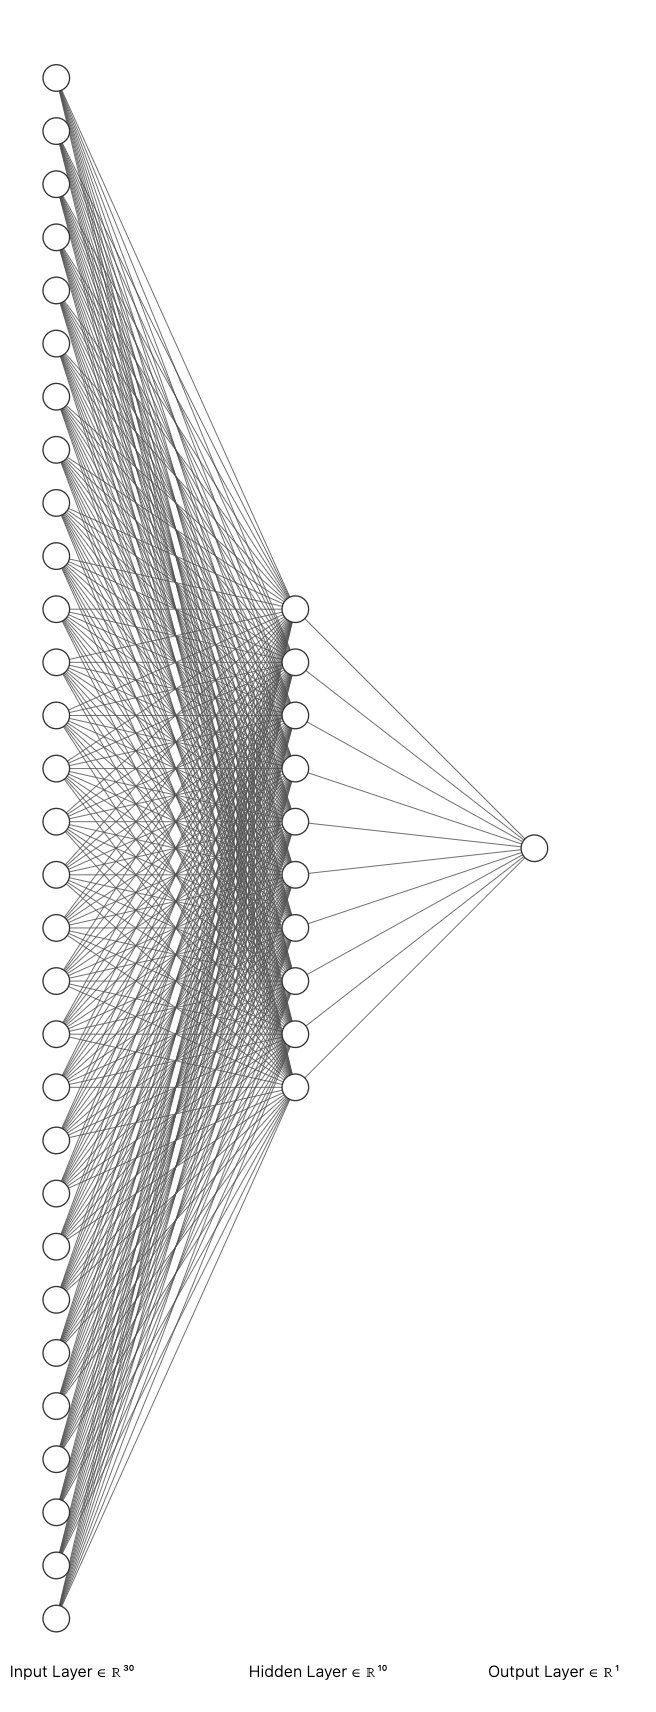

Each connection has a weight. The network learns by adjusting these weights.

**Step 5**: Train Model 

In [169]:
# Train model
print("Training simple model...")
nn_simple.fit(X_train, y_train)
print(f"Training complete. Iterations: {nn_simple.n_iter_}")

Training simple model...
Training complete. Iterations: 1000


/Users/kuba/.vir-envs/base/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



**Step 6**: Evaluate Results

In [170]:
# Predictions
y_pred_simple = nn_simple.predict(X_test)
y_pred_simple

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [171]:
# Calc accuracies
acc_simple = accuracy_score(y_test, y_pred_simple)

print(f"Simple NN Accuracy: {acc_simple:.3f}")

# Detailed evaluation
print("\nSimple Neural Network:")
print(classification_report(y_test, y_pred_simple, target_names=data.target_names))

Simple NN Accuracy: 0.939

Simple Neural Network:
              precision    recall  f1-score   support

   malignant       0.95      0.88      0.91        42
      benign       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



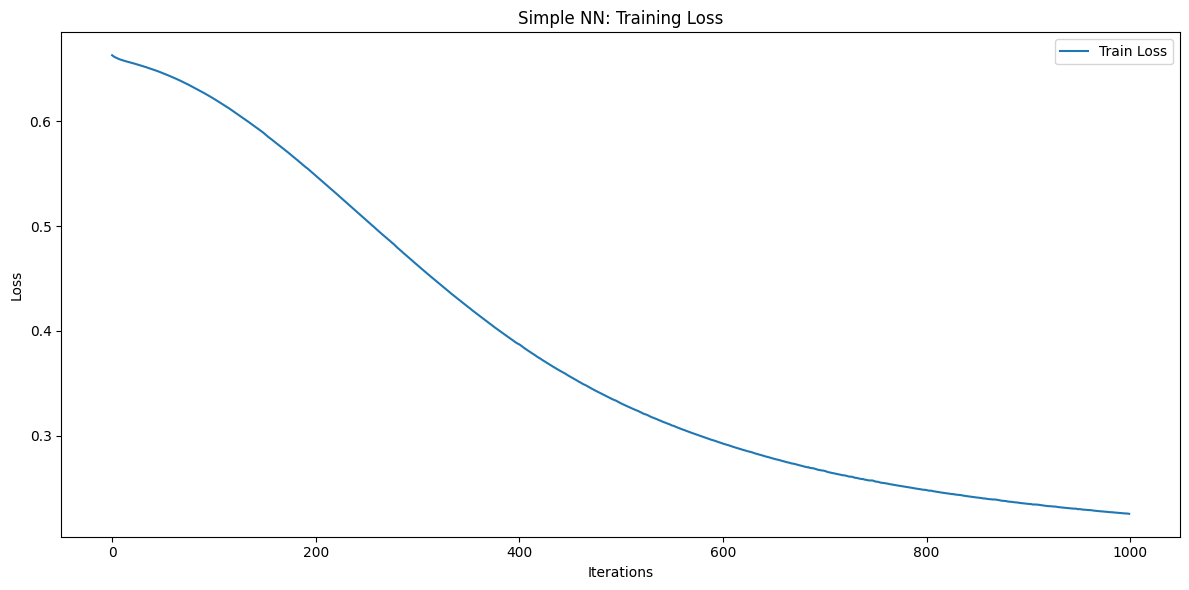

In [172]:
# Plot training loss
plt.figure(figsize=(12, 6))

plt.plot(nn_simple.loss_curve_, label="Train Loss")
plt.title('Simple NN: Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Hour 2 Exercise and Homework:

To gain a better intuition and understanding of how NN's work, we highly recommend watching the following two videos:
- [But what is a neural network? | Deep learning chapter 1](https://www.youtube.com/watch?v=aircAruvnKk&t=993s)
- [Gradient descent, how neural networks learn | Deep learning chapter 2](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=1043s)
